In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['text.usetex'] = False
plt.rcParams.update({'font.size': 14})

In [ ]:
PATH = './Data/'

In [ ]:
data_train = pd.read_csv(PATH+"titanic-train.csv")
data_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# **Analysis**

In [ ]:
print(f"total data shape: {data_train.shape}")

def unique_features(data):
    for feature in data.columns:
        num = len(data.loc[:,feature].unique())
        print(f"feature {feature:11s}: unique values = {num}")

unique_features(data_train)

total data shape: (891, 12)
feature PassengerId: unique values = 891
feature Survived   : unique values = 2
feature Pclass     : unique values = 3
feature Name       : unique values = 891
feature Sex        : unique values = 2
feature Age        : unique values = 89
feature SibSp      : unique values = 7
feature Parch      : unique values = 7
feature Ticket     : unique values = 681
feature Fare       : unique values = 248
feature Cabin      : unique values = 148
feature Embarked   : unique values = 4


In [ ]:
def barplots(feature,data):
    feature_counts = data.value_counts(feature).sort_index()
    fig, ax = plt.subplots(1, 3, figsize=(15, 2))
    fig.subplots_adjust(wspace=0.2)
    ax = ax.flatten()
    ax[0].barh(feature_counts.index,feature_counts.values/data.shape[0]*100)
    ax[0].set_xlabel('percent in all cases')

    survived_by_feature = data.groupby(feature, as_index=True)['Survived'].sum()
    total_survived_cases = data_train.loc[:,'Survived'].sum()
    ax[1].barh(survived_by_feature.index,survived_by_feature.values/total_survived_cases*100)
    ax[1].set_xlabel('percent in survived cases')

    return survived_by_feature, feature_counts, ax, fig

## **Pclass**

In [ ]:
data_train.value_counts('Pclass',dropna=False)


Pclass
3    491
1    216
2    184
dtype: int64

percent of Pclass3 survived = 24.24
percent of Pclass2 survived = 47.28
percent of Pclass1 survived = 62.96


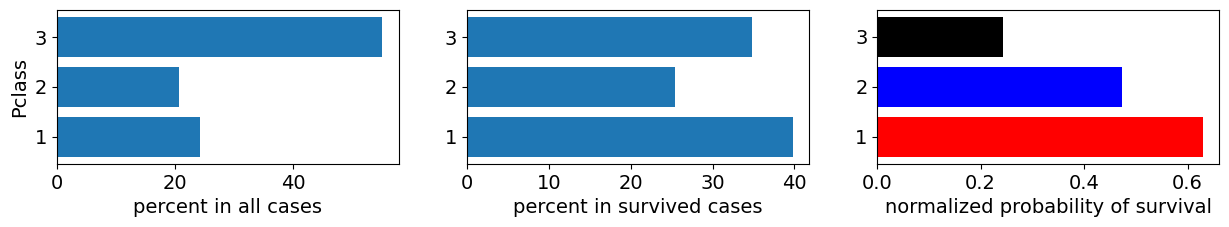

In [ ]:
survived_by_feature, feature_counts, ax, fig = barplots('Pclass',data_train)

normalized_probability = [survived_by_feature[1]/feature_counts[1],
                          survived_by_feature[2]/feature_counts[2],
                          survived_by_feature[3]/feature_counts[3]]
ax[2].barh(['1','2','3'],np.array(normalized_probability),color=['red', 'blue', 'black'])
ax[2].set_xlabel('normalized probability of survival')
ax[0].set_ylabel('Pclass')

Pclass3 = data_train.loc[data_train['Pclass'] == 3]['Survived']
print(f"percent of Pclass3 survived = {sum(Pclass3)/len(Pclass3)*100:.2f}")
Pclass2 = data_train.loc[data_train['Pclass'] == 2]['Survived']
print(f"percent of Pclass2 survived = {sum(Pclass2)/len(Pclass2)*100:.2f}")
Pclass1 = data_train.loc[data_train['Pclass'] == 1]['Survived']
print(f"percent of Pclass1 survived = {sum(Pclass1)/len(Pclass1)*100:.2f}")

plt.show()

In [ ]:
correlation = data_train['Pclass'].corr(data_train['Survived'])
print(f"correlation of Survival with Pclass is {correlation:.4f}")

correlation of Survival with Pclass is -0.3385


## **sex**

In [ ]:
data_train.value_counts('Sex',dropna=False)


Sex
male      577
female    314
dtype: int64

percent of men survived = 18.89
percent of women survived = 74.20


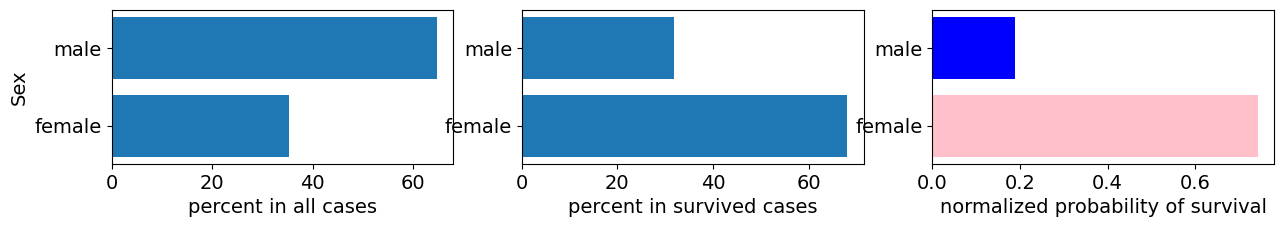

In [ ]:
survived_by_feature, feature_counts, ax, fig = barplots('Sex',data_train)

normalized_probability = [survived_by_feature['female']/feature_counts['female'],
                          survived_by_feature['male']/feature_counts['male']]
ax[2].barh(['female','male'],np.array(normalized_probability),color=['pink', 'blue'])
ax[2].set_xlabel('normalized probability of survival')
ax[0].set_ylabel('Sex')

survived_men = data_train.loc[data_train['Sex'] == 'male']['Survived']
print(f"percent of men survived = {sum(survived_men)/len(survived_men)*100:.2f}")
survived_women = data_train.loc[data_train['Sex'] == 'female']['Survived']
print(f"percent of women survived = {sum(survived_women)/len(survived_women)*100:.2f}")

plt.show()

In [ ]:
def sex_to_catg(sex):
    if sex == 'female':
        return 0
    return 1

data_train['Sex'] = data_train['Sex'].apply(sex_to_catg)


In [ ]:
correlation = data_train['Sex'].corr(data_train['Survived'])
print(f"correlation of Survival with Sex is {correlation:.4f}")

correlation of Survival with Sex is -0.5434


## **Age**

In [ ]:
data_train.value_counts('Age',dropna=False)


Age
NaN      177
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.92       1
36.50      1
0.42       1
Length: 89, dtype: int64

In [ ]:
mean_Age = data_train['Age'].mean()
data_train['Age'] = data_train['Age'].fillna(mean_Age)

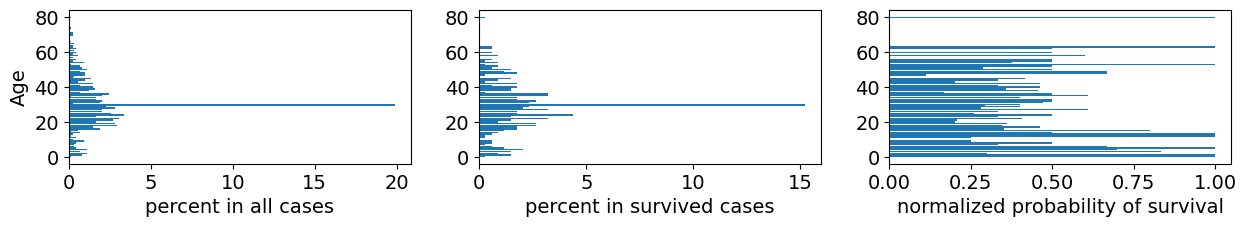

In [ ]:
survived_by_feature, feature_counts, ax, fig = barplots('Age',data_train)

normalized_probability = []
for i in feature_counts.index:
    normalized_probability.append(survived_by_feature[i]/feature_counts[i])

ax[2].barh(feature_counts.index,np.array(normalized_probability))
ax[2].set_xlabel('normalized probability of survival')
ax[0].set_ylabel('Age')
plt.setp(ax, yticks=range(0,100,20))

plt.show()

In [ ]:
correlation = data_train['Age'].corr(data_train['Survived'])
print(f"correlation of Survival with Age is {correlation:.4f}")

correlation of Survival with Age is -0.0698


## **SibSp**

In [ ]:
data_train.value_counts('SibSp',dropna=False)


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64

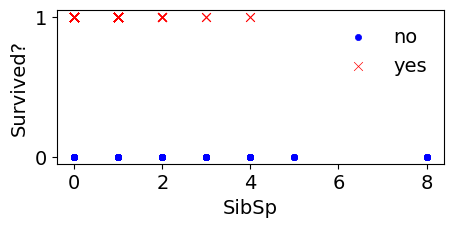

In [ ]:
yes = data_train.loc[:,'Survived'] == 1
no = data_train.loc[:,'Survived'] == 0
def cont_plot(feature):
    plt.figure(figsize=(5,2))
    plt.scatter(data_train.loc[no,feature],np.zeros(no.sum()),marker='o',color='b',s=20,linewidth=0.5,label='no')
    plt.scatter(data_train.loc[yes,feature],np.ones(yes.sum()),marker='x',color='r',s=40,linewidth=0.5,label='yes')
    plt.xlabel(feature)
    plt.ylabel('Survived?')
    plt.yticks([0,1])
    plt.legend(frameon=False)
    plt.show()

cont_plot('SibSp')

In [ ]:
correlation = data_train['SibSp'].corr(data_train['Survived'])
print(f"correlation of Survival with SibSp is {correlation:.4f}")

correlation of Survival with SibSp is -0.0353


## **Parch**

In [ ]:
data_train.value_counts('Parch',dropna=False)


Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
dtype: int64

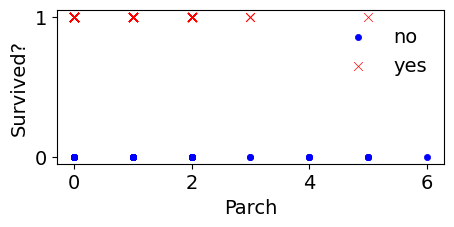

In [ ]:
cont_plot('Parch')


In [ ]:
correlation = data_train['Parch'].corr(data_train['Survived'])
print(f"correlation of Survival with Parch is {correlation:.4f}")

correlation of Survival with Parch is 0.0816


## **Fare**

In [ ]:
data_train.value_counts('Fare',dropna=False)


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.1125      1
8.1375      1
17.4000     1
8.1583      1
7.7292      1
Length: 248, dtype: int64

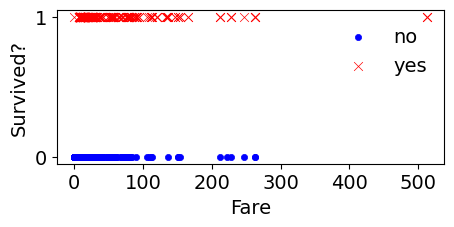

In [ ]:
cont_plot('Fare')


In [ ]:
correlation = data_train['Fare'].corr(data_train['Survived'])
print(f"correlation of Survival with Fare is {correlation:.4f}")

correlation of Survival with Fare is 0.2573


## **Cabin**

In [ ]:
data_train.value_counts('Cabin',dropna=False)


Cabin
NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
C62 C64          1
C54              1
B39              1
C50              1
A10              1
Length: 148, dtype: int64

In [ ]:
data_train['Cabin'] = data_train['Cabin'].fillna('N')
def group_cabin(cabin):
    return cabin[0]

data_train['Cabin'] = data_train['Cabin'].apply(group_cabin)
data_train.value_counts('Cabin',dropna=False)


Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
dtype: int64

## **Embarked**

In [ ]:
data_train.value_counts('Embarked',dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
dtype: int64

In [ ]:
index_nanEmbarked = data_train[data_train.Embarked.isna()].index.values
data_train = data_train.drop(index_nanEmbarked)
data_train.value_counts('Embarked',dropna=False)

Embarked
S    644
C    168
Q     77
dtype: int64

# **Cleaning**

## **Normalize Age and Fair data**

In [ ]:
mean_Age, std_Age = data_train.Age.mean(), data_train.Age.std()
mean_Fare, std_Fare = data_train.Fare.mean(), data_train.Fare.std()

data_train.Age = (data_train.Age-mean_Age)/std_Age
data_train.Fare = (data_train.Fare-mean_Fare)/std_Fare


data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.590163,1,0,A/5 21171,-0.499958,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.643609,1,0,PC 17599,0.788503,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.281720,0,0,STON/O2. 3101282,-0.486376,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.412277,1,0,113803,0.422623,C,S
4,5,0,3,"Allen, Mr. William Henry",1,0.412277,0,0,373450,-0.483861,N,S


## **Drop columns**

In [ ]:
data_train_Cleaned = data_train.drop(columns=['PassengerId','Name','Ticket'])
data_train_Cleaned.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,-0.590163,1,0,-0.499958,N,S
1,1,1,0,0.643609,1,0,0.788503,C,C
2,1,3,0,-0.281720,0,0,-0.486376,N,S
3,1,1,0,0.412277,1,0,0.422623,C,S
4,0,3,1,0.412277,0,0,-0.483861,N,S
5,0,3,1,0.003522,0,0,-0.475645,N,Q
6,0,1,1,1.877380,0,0,0.397723,E,S
7,0,3,1,-2.132377,3,1,-0.221775,N,S
8,1,3,0,-0.204609,0,2,-0.421820,N,S
9,1,2,0,-1.207048,1,0,-0.040764,N,C


## **One-hot encoding**

In [ ]:
cat_features = ['Pclass','Embarked','Cabin']
print(f"The multiclass categorical features are:\n{cat_features}")
data_train_OHE = pd.get_dummies(data = data_train_Cleaned, prefix = cat_features, columns = cat_features)

print(f"total number of features after one-hot encoding: {len(data_train_OHE.columns)-1}")

The multiclass categorical features are:
['Pclass', 'Embarked', 'Cabin']
total number of features after one-hot encoding: 20


## **Correllation**

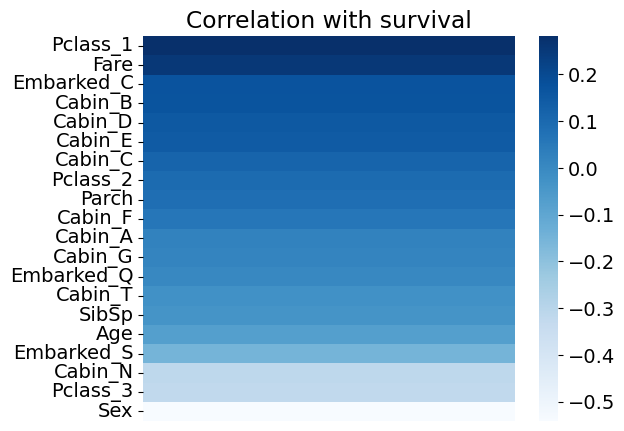

In [ ]:
corr = data_train_OHE.corr().loc[:,'Survived']
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(6,5))
sns.heatmap(corr.iloc[1:].to_frame(), cmap="Blues", xticklabels=False, yticklabels=True)
plt.title('Correlation with survival')
plt.show()


# **Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split
X = data_train_OHE.drop(columns='Survived')
y = data_train_OHE.Survived
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=1)
print(f"X_train.shape = {X_train.shape}, X_test.shape = {X_test.shape}")
print(f"y_train.shape = {y_train.shape}, y_test.shape = {y_test.shape}")


X_train.shape = (711, 20), X_test.shape = (178, 20)
y_train.shape = (711,), y_test.shape = (178,)


## **Logistic Regression**

In [ ]:
model_LG = LogisticRegression()
model_LG.fit(X_train, y_train)
ytr_pred = model_LG.predict(X_train)
y_pred = model_LG.predict(X_test)

Logistic Regression:
 train accuracy = 80.73%, test accuracy = 85.39%
Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       105
           1       0.83      0.81      0.82        73

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178



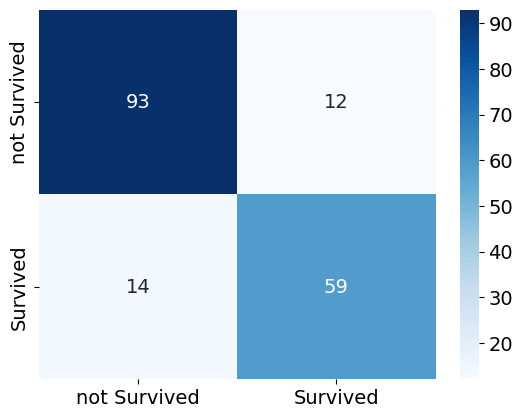

In [ ]:
trainAcc_LG = metrics.accuracy_score(ytr_pred,y_train)*100
testAcc_LG = metrics.accuracy_score(y_pred,y_test)*100
print("Logistic Regression:")
print(f" train accuracy = {trainAcc_LG:.2f}%, test accuracy = {testAcc_LG:.2f}%")
print("="*70)

print("Report:")
print(metrics.classification_report(y_test,y_pred))

con_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(con_matrix,annot=True, cmap= 'Blues',
            xticklabels=['not Survived', 'Survived'],
            yticklabels=['not Survived', 'Survived'])
plt.show()

In [ ]:
corr

Survived      1.000000
Pclass_1      0.282368
Fare          0.255290
Embarked_C    0.169966
Cabin_B       0.166714
Cabin_D       0.151555
Cabin_E       0.146142
Cabin_C       0.115629
Pclass_2      0.095002
Parch         0.083151
Cabin_F       0.058388
Cabin_A       0.022701
Cabin_G       0.016261
Embarked_Q    0.004536
Cabin_T      -0.026409
SibSp        -0.034040
Age          -0.074673
Embarked_S   -0.151777
Cabin_N      -0.313435
Pclass_3     -0.320171
Sex          -0.541585
Name: Survived, dtype: float64